**Motivation and learning goals:**
    
An important part of learning how to program is to read and learn from others' code. As you evolve in your programming journey, you will find that you can not only *understand what code does*, but also start to find problems in the code and *opportunities for improvement*. This is an important stage in the learning process, allowing you to start to think beyond *'How can this be solved?'* to *'How could this be solved in a better way?'*. Combined with obtaining constructive feedback *on your own code* this is a proven strategy to quickly improve the way you program.

What we expect from you for this part of the assignment:

* Give feedback that is constructive: write feedback in a way that can help the group who wrote the code to improve.  
* A good rule of thumb is to aim to spend between 15 - 30 minutes for each notebook you give feedback on.
* Aim to give at least one useful suggestion that you think the other group would appreciate.
* You can answer most questions with Yes/No, except for the ones which ask for an example. Write at least one sentence for the latter type of question.
* If you see something in the code that you particularly liked, write that down - the group will probably be pleased to hear what they did extremely well.
* You are free to write short code snippets as suggestions if you want, but remember we do not require you to debug code that does not work.
* If your feedback is found to have inappropriate/rude language, or if there are no examples in the required questions, you will be asked to revise it and resubmit.

The assignments will be graded as usual by the teachers and TAs. Your feedback will be sent to each group by us, anonymizing who gave the feedback.

**What your feedback should contain (rubric):**

You should answer the following questions in your peer review:

*Readability*

* Is the code easy to understand? Does it have enough comments that help you follow its logic? Yes

* Are the figures clear? Yes

*Accuracy*

* Does the code run without producing errors? No, couple of errors.

* Are the results reasonable? Did you find any mistakes in the implementation? Yes, Fourier was wrong

*Comparison to own approach*

* Was the implementation similar to your own? Overall pretty similiar except for a couple of problems

* How was the implementation different than yours? Write an example or two. Fourier Interpolation was a bit different, points were not scaled and equally spaced between [0,$2\pi$). 

*Overall strengths*

* What part of the code did you find was done well? Write at least one example (could be a clear figure, a smart use of array indexing etc). 
Creating a function to extract the data using SID as paramters in problem 2 task 1c.

*Suggestions for improvement*

* How could this code be improved with respect to readability, accuracy or efficiency? Write at least one example. 
A bit more accruate for example, the error was over 4000 which is not plausible. Try to assess the reasonableness of the answers. 

# Interpolation and Approximation

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", 
as well as your name(s) and group number in the cell below:

In [1]:
NAMES = "Angelo Bridi"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "11"                # fill in your group number between the quotes

## Before you start...

A note from the teachers:

In our journey through our numerical analysis course, we've witnessed your progress and effort to improve your coding abilities and learn how to 'digitize' math problems with numerical recipes. As we delve deeper into the subject matter, it's time to take the next steps in the learning process.

We've designed a more complex assignment for you, one that will stretch your analytical abilities and allow you to explore new methodologies, enabling you to learn by stepping a bit outside your comfort zones.

Additionally, we're introducing a peer feedback component to this assignment. Providing feedback to your peers is a valuable learning experience, as it not only allows you to critically assess others' work but also provides insights into your own approach and understanding of the material. Constructive feedback fosters a culture of collaboration and mutual support, enriching our collective learning journey.

We understand that stepping into unfamiliar territory can be daunting, but remember, it is through facing challenges that we truly grow. Embrace this opportunity with an open mind and a willingness to explore. Stepping stones are placed along the way to help you reach the end. Even if you don't find a working solution for a task, explain your thought process and what you tried but didn't work. The feedback you will receive will help you through. 

As always, the teachers and TA's are here to help in the exercise sessions or via email/Canvas.

We hope you'll enjoy the process.

Practicalities:

This assignment has three parts.
* Part 1: tools. In this part you implement tools for interpolation and approximation. (Due Apr 19)
* Part 2: applying your tools in the real world. In this part you explore a public dataset and apply tools from part 1 to solve two problems. (Due Apr 19)
* Part 3: class-wide results and peer feedback. In this part you will use the results collected by the entire class to solve a problem. You will also go over the assignments submitted by two other groups and give them feedback on their code and solutions. (Due May 3)

Timeline:
* Complete parts 1 and 2 (this notebook) by April 19. Submit the notebook on Canvas and fill in the online form from part 2.
* Receive part 3 notebook and the part 1,2 notebooks from two other groups on April 22.
* Complete part 3 and peer feedback by May 3. Instructions will be given on April 22.

**As you tackle parts 1 and 2 below keep in mind that your code and thought process needs to be clear and well-explained via comments, so that the students who evaluate your assignment can follow along.**


---

# Part 1: Tools

## Problem 1

Let's create a very small data set. In this part you will program various methods for interpolation for the general case and then test your code on this small example.

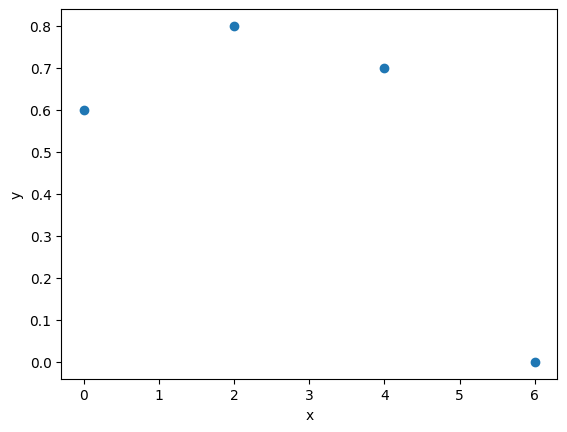

In [2]:
# just run this cell
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,7,2)
y = np.array([0.6, 0.8, 0.7, 0])


# Let's have a quick look at the data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.1

#### Monomials, Vandermonde matrix

First check out the section on Polynomial interpolation via monomial basis functions in the Interpolation lecture notebook (posted Monday 8) and the Numerical methods book by Gezerlis. We know the function $f(x)$ which we wish to interpolate at the points $x_j$, where it takes values $y_j$.

Recall that we wrote the interpolating polynomial that approximates this function $f$ as:
\begin{equation}
p(x) = \sum_{k=0}^{n-1} c_k \phi_k(x)
\end{equation}

where the $\phi_k$ are basis functions and the $k$ runs over the number of points k = 0,...,n-1.

By evaluating $p(x)$ at the given datapoints $x_j$ we get a set of $n$ equations, which we can write in matrix form:

$$\begin{pmatrix}
\phi_0(x_0) & \phi_1(x_0) & \ldots & \phi_{n-1}(x_0)\\
\phi_0(x_1) & \phi_1(x_1) &  \ldots & \phi_{n-1}(x_1)\\
\phi_0(x_2) & \phi_1(x_2) &  \ldots & \phi_{n-1}(x_2) \\
\vdots & \vdots & \vdots &  \vdots \\
\phi_0(x_{n-1}) & \phi_1(x_{n-1}) &  \ldots & \phi_{n-1}(x_{n-1}) \\
\end{pmatrix}
\begin{pmatrix}c_0 \\ c_1 \\ c_2 \\ \vdots \\ c_{n-1}\end{pmatrix} =
\begin{pmatrix}y_0 \\ y_1 \\  y_2 \\ \vdots \\ y_{n-1}\end{pmatrix}
$$

or in vector notation:
$$V \vec{c} = \vec{y}$$

where in this case we choose the basis functions to be monomials: $\phi_k = x^k$.


#### Task 1:

Write a function `vandermonde` which takes a vector of data points $x$ and from that constructs  the **Vandermonde** matrix $V$, **without using** `np.vander`:

$$V = \begin{pmatrix}
1 & x_0 & x_0^2 & \ldots & x_0^{n-1}\\
1 & x_1 & x_1^2 & \ldots & x_1^{n-1}\\
1 & x_2 & x_2^2 & \ldots & x_2^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n-1} & x_{n-1}^2 & \ldots & x_{n-1}^{n-1} \\
\end{pmatrix}$$

Each column of the Vandermonde matrix contains a *monomial* (i.e a polynomial with only one order) of $x$.

Note that you will need to find $n$, which is the length of the vector $x$ (with elements $x_i$, where $i=0\ldots n-1$).

You should attempt to avoid using nested for loops.

Hint: Note that each column is $x$-times the column on its left. So I suggest you initialize the matrix to be a $n \times n$ matrix with all ones 
(let's call it `V`, and then loop over columns $j= 1\ldots n-1$ and set the $j$-th column of `V` to $x$ times the $j-1$-th column of `V`.

In [3]:
def vandermonde(x):
    ### BEGIN 
    n=len(x)
    V=np.array([])
    for k in range(n):
        Vk=[x[k]**i for i in range(n)] #You said to try not to but it was too tempting here
        V=np.append(V,Vk)
    V=np.reshape(V,(n,n))

    ### END SOLUTION
    return V
# now call our function with our test vector
V = vandermonde(x)
V


array([[  1.,   0.,   0.,   0.],
       [  1.,   2.,   4.,   8.],
       [  1.,   4.,  16.,  64.],
       [  1.,   6.,  36., 216.]])

Make sure that your function works by comparing it with `numpy`s version. 
Note, that `np.vander` has the columns in the opposite order, 
unless we call it with the parameter `increasing=True` the default is `False`.

In [4]:
assert (V == np.vander(x, increasing=True)).all()

**Task 2:** 

Now solve the system of equations

$$V \vec{c} = \vec{y}$$

and turn the coefficients vector $\vec{c}$ (a vector of length $n$ which in our case is $n=3$) into a `poly1d` object. 

Check out the section on `np.poly1d()` in the Interpolation lecture notebook. Note that a `poly1d` has the coefficients stored in descending order of $x$, so for example 

``` python
a = np.poly1d([2, 1, -1])
```
corresponds to the polynomial 

$$ p(x) = (2)x^2 + (1)x^1 + (-1) x^0 = 2x^2 +x -1 $$

So you will have to either flip the matrix around before solving the system of equations, or turn the solution vector around before calling `np.poly1d()` on it.

Print the resulting polynomial. Note, using `print(p)` will try and print a pretty version of the polynomial showing the various powers of x and their coefficients. 

You can get just the coefficients by using `print(p.coefficients)`. 

Finally, just using `p` as the last statement of the cell will reproduce the statement that generates the polynomial.

In [5]:
# create a poly1d object from the solution and call it p
# p = np.poly1d(...)

### BEGIN SOLUTION
c=np.linalg.solve(V,y)[::-1]
p=np.poly1d(c)
### END SOLUTION

print(p)
print(p.coefficients)
p

          3             2
-0.00625 x - 4.163e-17 x + 0.125 x + 0.6
[-6.25000000e-03 -4.16333634e-17  1.25000000e-01  6.00000000e-01]


poly1d([-6.25000000e-03, -4.16333634e-17,  1.25000000e-01,  6.00000000e-01])

Because we now have our solution in the form of a `poly1d` object, we can very easily evaluate that polynomial on a new vector.

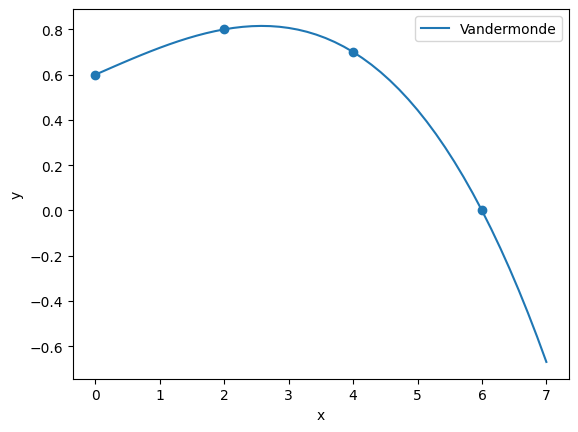

In [6]:
# just run this 

t = np.linspace(0, 7)     # we are using linspace's default of 50 points
zp = p(t)
# start by showing the original data again
plt.scatter(x, y)
# now plot the interpolating data
plt.plot(t, zp, label='Vandermonde')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 1.2 

#### Lagrange polynomials

As we saw in the lecture, the *Lagrange* polynomial is defined as:

\begin{equation}
L_k(x) = \frac{\Pi_{j=0,j\neq k}^{n-1} (x-x_j)}{\Pi_{j=0,j\neq k}^{n-1}(x_k - x_j)}, \,\,\, k = 0,1,...n-1
\end{equation}

or more simply:

$$L_k(x) = \prod_{j=0, j\ne k}^{n-1} \frac{x - x_j}{x_k - x_j}$$

which has the property

$$L_k(x_j) = \delta_{kj} = \left\{\begin{array}{ll}
1 & k = j \\
0 & k \ne j\end{array}\right.$$

We can construct an interpolating polynomial as follows

$$p(x) = \sum_{i=0}^{n-1} y_i L_i(x)$$


**Task 1:**

Write a function `Lagrange` that takes two vectors, $x$ and $y$, and generates the polynomial $p(x)$ by looping over $x$ and $y$. You will have to use an inner loop to build up $L_i(x)$ and an outer loop which sums up $y_i L_i(x)$. 

Note that you will need to initialize the sum with `np.poly1d(0.0)` and initialize the products $L_i(x)$ with `np.poly1d(1.0)`, in order that you can iterate over terms that you want to add or multiply onto them.

Make use of the fact that the factors $\frac{x - x_j}{x_i - x_j}$ appearing in $L(x)$ can be represented in Python using numpy's `poly1d` objects like this

``` python
p = np.poly1d([1.0, -x[j]])/(x[i]-x[j])
```
                                  
Do not use the existing `lagrange` function from scipy.

In [7]:
def Lagrange(x, y):
    ### BEGIN SOLUTION
     n = len(x)

     p = np.poly1d(0.0)  # Initialize the sum
     for i in range(n):
        L = np.poly1d(1.0)  # Initialize the product L_i(x)
        for j in range(n):
            if i != j:      #special case
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])  # Build up L_i(x)
        p += y[i] * L  # Sum up y_i * L_i(x)
     return p
    ### END SOLUTION

# use it on our test case
q = Lagrange(x, y)
q

poly1d([-0.00625,  0.     ,  0.125  ,  0.6    ])

**Task 2:**

Compare the polynomial $p$ from problem 1.1 and polynomial $q$ from problem 1.2. Obviously, we want the result to be the same, within machine precision. Plot both polynomials and quantify their difference.

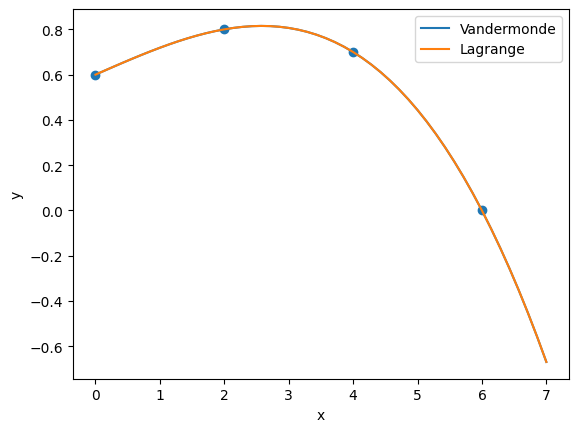

In [8]:
# BEGIN SOLUTION
t = np.linspace(0, 7) 
zp = p(t)
zq = q(t)
# start by showing the original data again
plt.scatter(x, y)
# now plot the interpolating data
plt.plot(t, zp, label='Vandermonde')
plt.plot(t, zq, label='Lagrange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# END SOLUTION

## 1.3

**Fourier interpolation**

Check out the second lecture on interpolation and also the in the Numerical methods book by Gezerlis, Chapter 6 Finite Series: Trigonometric interpolation.

If we have reason to believe that our data are described by a periodic function, then we can use Fourier interpolation. We have n data points with values $y_j$ at locations $x_j$, where $j = 0, 1, ... n-1$. 

Imporant! The $x_j$ points are equidistant and placed at 

\begin{equation}
x_j = \frac{2 \pi j}{n}
\end{equation}

so they span the range [0, $2\pi$). 

We restrict ourselves to the case where n is even, so that $n = 2m$ (m is some integer).

The interpolating function is of the form:
\begin{equation}
p(x) = \frac{1}{2} a_0 + \sum_{k=1}^{m-1} (a_k cos(kx) + b_k sin(kx)) + \frac{1}{2}a_m cos(mx) \,\,\,\, (1)
\end{equation}

where the coefficients $a_k, b_k$ are found from 
\begin{equation}
a_k = \frac{1}{m} \sum_{j=0}^{n-1} (y_j cos(kx_j), \,\,\, k = 0,1,...m \,\,\,\,\, (2)
\end{equation}

\begin{equation}
b_k = \frac{1}{m} \sum_{j=0}^{n-1} (y_j sin(kx_j), \,\,\, k = 1,2,...m-1 \,\,\,\,\,\, (3)
\end{equation}

So trigonometric interpolation has two steps: first, evaluate the coefficients fot a given dataset. We do this so that we don't re-evaluate these parameters every time we wish to evaluate the interpolating function in a new point. Second, compute the value of the interpolating function at desired locations, given the determined parameters.

**Task1:**

Implement Fourier interpolation by defining two functions:
- `computeparams` is a function that takes in two data arrays (x and y) and computes the coefficients (equations 2,3). It returns two arrays that hold the coefficients a_k and b_k.
- `triginterp` is the interpolating function (equation 1). It takes as input the arrays of all coefficients a_k, b_k and an array of points x where the interpolation is to happen. It evaluates the values of $p(x)$ at at points x and returns those values.

Store the arrays of the coefficients $a_k$ and $b_k$ in the variable names `aparams` and `bparams`.

In [9]:
# BEGIN SOLUTION
def computeparams(x,y):
    n=len(x)
    assert n==len(y)
    assert n%2==0
    m=int(n/2)
    

    #defining ak and bk
    a=np.array([])  #stored here
    b=np.array([])
    for k in range(m+1):
        ak, bk=0,0 #initial value for sum
        for j in range(n):
            ak+=y[j]*np.cos(k*x[j])
            bk+=y[j]*np.sin(k*x[j])
        a=np.append(a,ak/m)
        b=np.append(b,bk/m)
    b=b[1:-1] #ignores the unnecissary elements
    return a,b

def triginterp(aparams, bparams, x):
    m=len(aparams)-1
    n=2*m
    not_sum=0.5*(aparams[0]+aparams[-1]*np.cos(x*m))
    are_sum=0*x
    aparams=aparams[1:-1]
    for k in range(m-1):
        are_sum = are_sum+ aparams[k]*np.cos((k+1)*x)+bparams[k]*np.sin((k+1)*x)
    return not_sum+are_sum

# END SOLUTION


**Task 2:**

Apply the Fourier interpolation to the data from problem 1.1. 

Hint: The Fourier interpolation we wrote down assumes that points are equally spaced in the interval [0,$2\pi$). You should therefore map/convert your points to be in this interval.

In [10]:
x = np.arange(0,7,2)
y = np.array([0.6, 0.8, 0.7, 0])

# BEGIN SOLUTION
n=len(x)
# Map x values to the interval [0, 2*pi)
x_mapped = [2*np.pi*j/n for j in range(n)]

# Compute the coefficients
aparams, bparams = computeparams(x_mapped, y)
print(aparams, bparams)
# END SOLUTION

[ 1.05 -0.05  0.25] [0.4]


**Task 3:**

Plot the original data points and overlay the interpolating function evaluated at `xs = np.linspace(0,x.max())`. The interpolating function should pass through the original points if all is well.

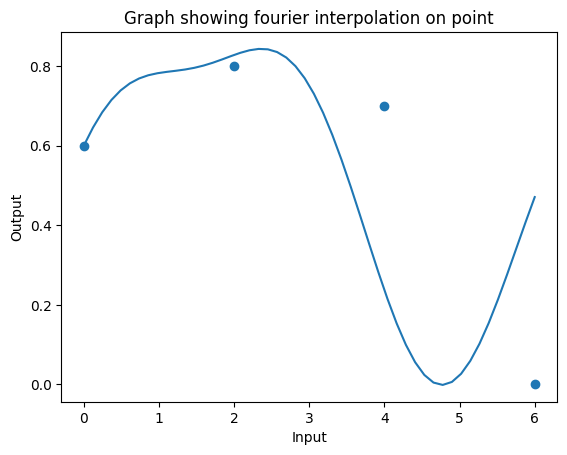

In [13]:
# BEGIN SOLUTION
plt.scatter(x,y, label='Data points')
xs = np.linspace(0,x.max())

plt.plot(xs, triginterp(aparams,bparams,xs),label='Interpolation')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Graph showing fourier interpolation on point')

plt.show()
# END SOLUTION

## Problem 2

Choose a suitable interpolation method to solve the following mathematical puzzle:

A water fountain of height $h$ is spraying water along a perfect parabola (see figure). The parabola has its vertex at a height of 3 meters and 1 meter away from the fountain. The water hits ground after another 2 meter to the right.

**Task 1:**

* Construct the quadratic polynomial that fits the path of the water and then use that polynomial to solve for the height $h$ of the fountain in meters.
* Store your solution in a variable called `h`.

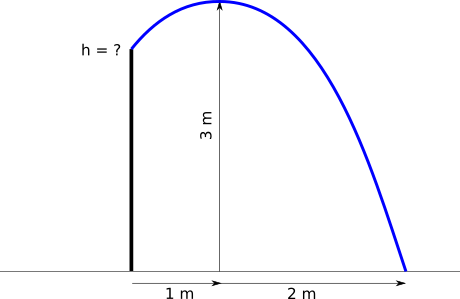

In [14]:
### BEGIN SOLUTION

#x=1 is the line of symmetry
#it goes through (1,3),(3,0),(-1,0) via symmetry and(0,h)
x=np.array([-1,1,3])
y=np.array([0,3,0])

def vandermonde(x):
    n=len(x)
    V=np.array([])
    for k in range(n):
        Vk=[x[k]**i for i in range(n)]
        V=np.append(V,Vk)
    V=np.reshape(V,(n,n))
    return V
V=vandermonde(x)
c=np.linalg.solve(V,y)[::-1]
def make_poly(x):
    poly=np.array([x**i for i in range(3)][::-1]).T
    return poly
h=c@make_poly(0)
### END SOLUTION

In [15]:
# If you have done everyting correctly, the following test should pass

assert h == 2.25

**Task 2:**

* Since we know the degree of the polynomial that describes the data, we can also use least-squares fitting. Use numpy's `polyfit` to compare your result with the interpolation method you used in the previous step.

In [ ]:
# YOUR CODE HERE
np.polyfit(x,y,2)[-1]

2.2500000000000093

---

# Part 2: Trends in global sea levels

**Challenge:** Can you use the tools you learned so far to find trends in the sea levels in different parts of the planet?

**Background:**

Sea levels are being monitored globally, to track how the surface of the Earth's waters changes with time. The data are collected via two main ways: 
* coastal stations which measure the sea level relative to the ground locally via tide gauges https://oceanservice.noaa.gov/facts/tide-gauge.html.
* satellites that measure the sea surface over most of the planet via altimetry https://sealevel.nasa.gov/faq/19/how-do-satellites-measure-sea-level-change/.

Sattelites provide higher accuracy and coverage of the planet's surface, but only have gathered data for a short time period. Coastal stations have been gathering data for many decades, but have poorer quality. In this assignment we use data from coastal stations because of their longer time-span. 

By analysing decades-long data from both sources, scientists have found that the global-average sea level is rising, lately at an accelerating pace. 

Your goal is to collect and analyse data from coastal stations in locations of your choice to see how the sea levels have been changing in different parts of the world.

Learn more at: 
- https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level
- https://www.eea.europa.eu/en/analysis/indicators/global-and-european-sea-level-rise#ref-2uriz


**Task overview:**
* Problem 1 guides you through using data from an online database to measure and document decades-long trends in the sea levels from different coastal stations. Your results should be uploaded so that the entire class can access them for Part 3.

* Problem 2 introduces you to data from a different database in order to model short-time variations in the sea levels via interpolation.

## Problem 1


### 1.a 
First we look at the data from one station in the USA, named Friday harbor, as an example. The code below downloads and plots the data. 

**Tasks**: 

* Write code that performs least-squares fitting of a straight line to the data.

* Overplot the fitted line on the existing plot. 

* Check that your fit didn't fail: we expect for this dataset a slope that is positive and slightly larger than 1.

C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


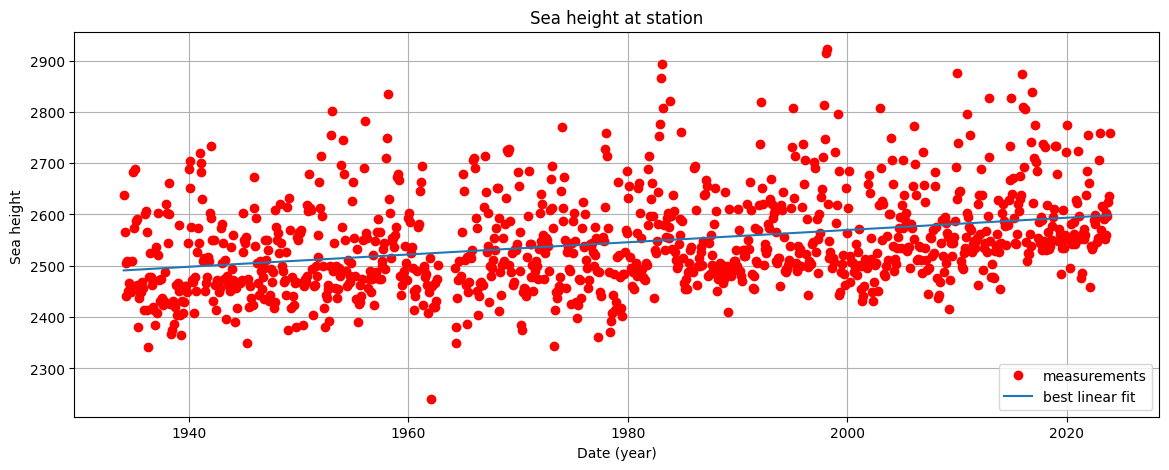

In [ ]:
import matplotlib.pyplot as plt # plotting functions
import numpy as np # numerical tools
import pandas as pd

# Friday Harbor station ID is 384. Change this to get data from another station. Use the map here: 
sid = 384
# you can find and load the sea level data
l="http://www.psmsl.org/data/obtaining/met.monthly.data/%d.metdata"%sid
df = pd.read_csv(url,delimiter=';', names = ['time','height','null', 'null2'])

# "bad" values in this dataset are defined by a large negative number, so we only
# accept positive values:
df = df[df.iloc[:,1] >= 0]

# convert the pandas dataframe to numpy array:
time= df['time'].to_numpy() # time is in years (with decimals)
height = df['height'].to_numpy()


# plot the sea height data:
plt.figure(figsize = (14,5))
plt.plot(time,height,'ro')

plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Sea height ')
plt.title('Sea height at station')

plt.axis('tight')



# BEGIN SOLUTION
p = np.polyfit(time,height,1)
def lsm(x,y):
    n=len(x)
    AT=np.matrix([x,np.ones(n)])
    A=AT.T
    X=np.linalg.inv(AT@A)@AT@y
    X=X.reshape((2,1))
    Var=[float(X[i]) for i in range(2)]

    error=np.linalg.norm(A@X-y)
    return Var[0], Var[1], error
m,b, error=lsm(time,height)
xs=np.array([time[0],time[-1]])
y=m*xs+b
plt.plot(xs,y)
plt.legend(['measurements','best linear fit'],loc=4)
plt.show()

# END SOLUTIONur

## 1.b

Not all stations have been monitoring data for the same time. Restrict your fit to only take into account points from 1980 to 2022. 

#### Tasks:

* Find a way to select only data points between 1980-2022.
* Fit a straight line to this restricted dataset.
* Store the slope and error on the slope as in variables named `my_slope` and `my_slope_err`, respectively.

In [ ]:
# YOUR CODE HERE
def find(x,p):
    n=len(x)
    t='Condition not met'
    for i in range(n):
        if x[i] >= p:
            t=i
            break
    return t

t1,t2=find(time,1980), find(time,2023)
my_time=time[t1:t2]
my_height=height[t1:t2]
my_slope,b,my_slope_error=lsm(my_time,my_height)
print(my_slope,my_slope_error)

1.0562474074510133 47465.47417080085


C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


## 1.c

Gathering your datasets...

### Tasks:
* Visit the map to check out the different stations: https://psmsl.org/data/obtaining/map.html#metadataTab

* Choose 3 different stations in any part of the world you wish.

* Repeat the above process for each station and store the slopes and errors you get. It will be helpful if you also make plots, but that is up to you.

**Important! Restrict the data to the years 1980 - 2022 so that we all compute a slope for the same timeline.**

C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]
C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]
C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


[8, 88, 12] [1.0562474074510133, 1.0562474074510133, 1.0562474074510133] [47465.47417080085, 47465.47417080085, 47465.47417080085]


C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


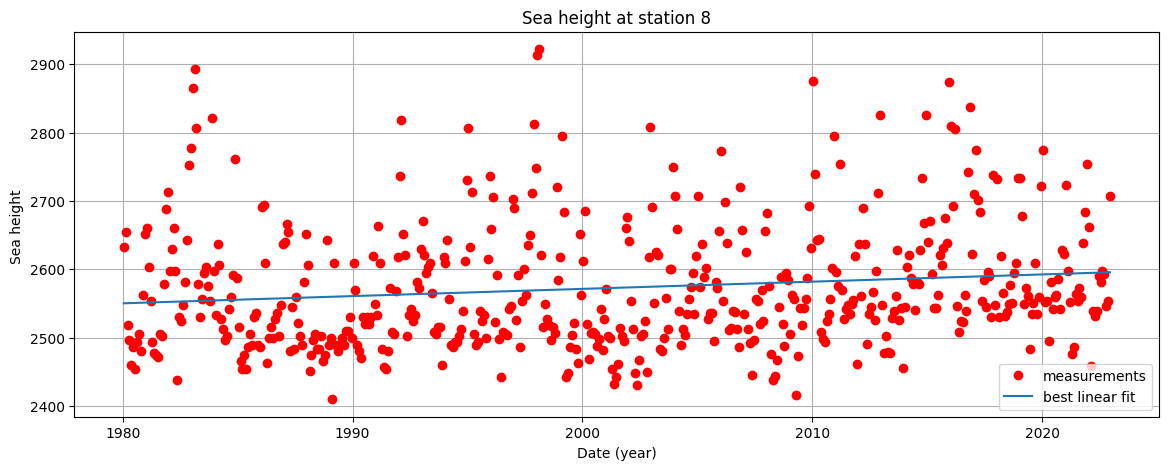

C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


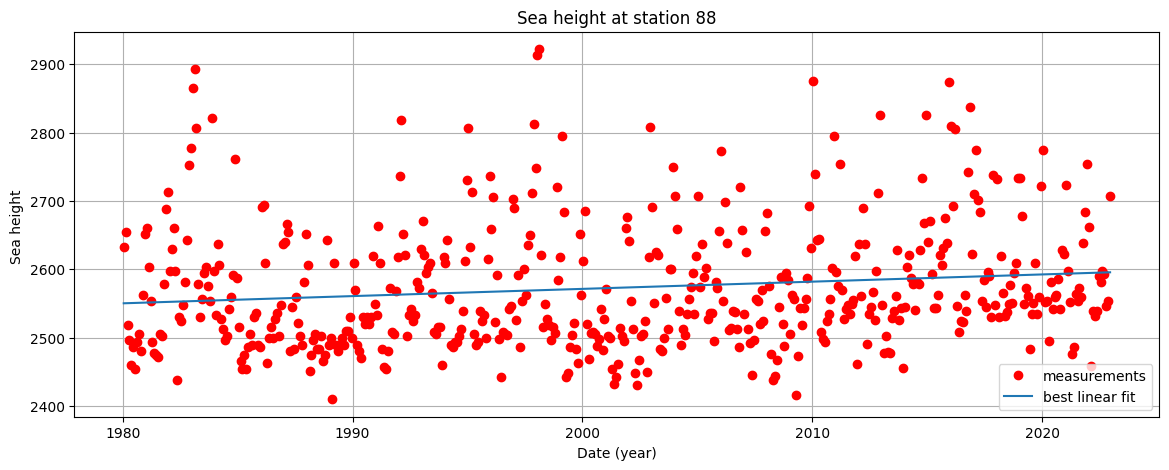

C:\Users\timda\AppData\Local\Temp\ipykernel_25428\2663596879.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Var=[float(X[i]) for i in range(2)]


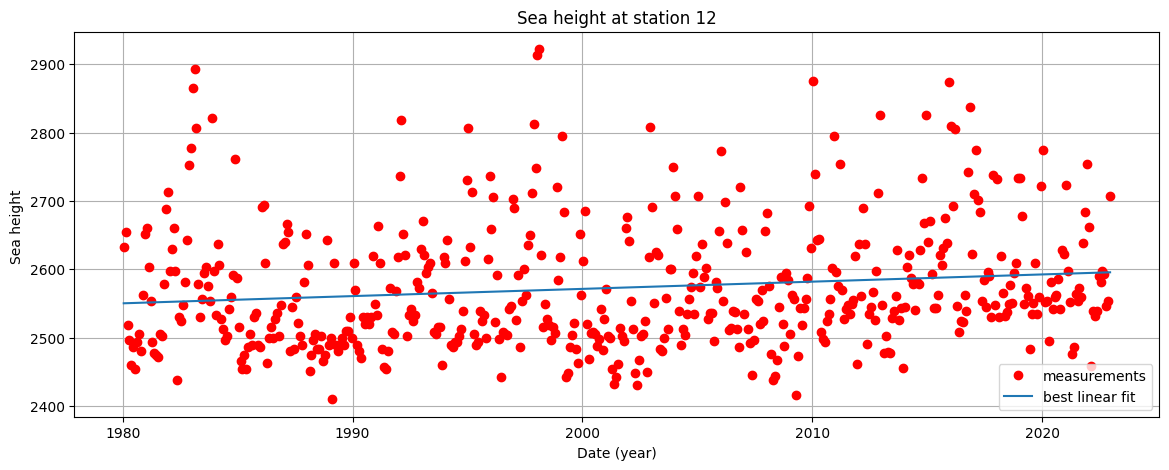

[8, 88, 12] [1.0562474074510133, 1.0562474074510133, 1.0562474074510133] [47465.47417080085, 47465.47417080085, 47465.47417080085]


In [ ]:
# YOUR CODE HERE
def choose_harbour(sid):
    '''
    Input: Takes in a SID
    Output: SID, time, height, slope,y-intersect, slope error 
    '''
    l="http://www.psmsl.org/data/obtaining/met.monthly.data/%d.metdata"%sid
    df = pd.read_csv(url,delimiter=';', names = ['time','height','null', 'null2'])
    df = df[df.iloc[:,1] >= 0]
    timex= df['time'].to_numpy() # time is in years (with decimals)
    heightx = df['height'].to_numpy()
    t1,t2 = find(timex,1980), find(timex,2023)
    time0=timex[t1:t2]
    height0=heightx[t1:t2]
    my_slope,b,my_slope_error=lsm(time0,height0)
    return [sid, time0, height0,my_slope,b,my_slope_error]
SIDS=[8,88,12]
D=[choose_harbour(i) for i in SIDS]

my_slopes = [L[3] for L in D]
my_errors = [L[5] for L in D]
my_X = [L[1] for L in D]

my_y = [L[2] for L in D]
my_c = [L[4] for L in D]

def plot_climate(sd):
    sd, X,H,S,c,E=choose_harbour(sd)
    title='Sea height at station ' + str(sd)
    plt.figure(figsize = (14,5))
    plt.plot(X,H,'ro')
    plt.grid()
    plt.xlabel('Date (year)')
    plt.ylabel('Sea height ')
    plt.title(title)
    plt.axis('tight')

    xs=np.array([X[0], X[-1]])
    y=S*xs+c
    plt.plot(xs,y)
    plt.legend(['measurements','best linear fit'],loc=4)
    plt.show()
print(SIDS,my_slopes, my_errors)
for i in SIDS:
    plot_climate(i)
print(SIDS,my_slopes, my_errors)

## 1.d

Each station has an info page. This is the one for Friday harbor: https://psmsl.org/data/obtaining/stations/384.php

### Tasks:
* Visit each of your selected station's info page to get its ID, longitude and latitude.

* Go to the form and fill in for each station its ID, longitude, latitude, slope and slope error: https://forms.office.com/e/XkfZKduvNM

* Write a sentence on what your results showed.

In [ ]:
# YOUR COMMENTS HERE
'''Don't think I'm able to get it to work'''

"Don't think I'm able to get it to work"

### To be continued... 
Your results from this problem will be collected along with those from all other groups. In Part 3 you will analyse these joint results to look for global trends.

---

## Problem 2:

The data from the psmsl database that we used in Problem 1 are sampled monthly or yearly. Part of the scatter we see comes from variations that happen within a month, related to the local tides and other effects. In this problem you get to work with data sampled every hour, from a different database to look into more detail at how sea levels can vary over short time spans.

## 2.a 

* Load in the high-sampling data for Friday harbor from the file linked in the Canvas assignment by running the next code block. These data have been sampled every hour and were downloaded from here:
https://tidesandcurrents.noaa.gov/waterlevels.html?id=9449880&units=standard&bdate=20240307&edate=20240407&timezone=GMT&datum=MLLW&interval=h&action=
You only need to load the data below, which has been pre-downloaded.

* Run the code block to plot the data.

* Check out the data format that pandas gives.

In [ ]:
# Run this to load the data as a pandas dataframe

# Friday harbor tides data
fname = 'CO-OPS_9449880_wl.csv'

df = pd.read_csv(fname, delimiter = ',', parse_dates=[['Date', 'Time (GMT)']])

C:\Users\timda\AppData\Local\Temp\ipykernel_25428\3516005733.py:6: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(fname, delimiter = ',', parse_dates=[['Date', 'Time (GMT)']])


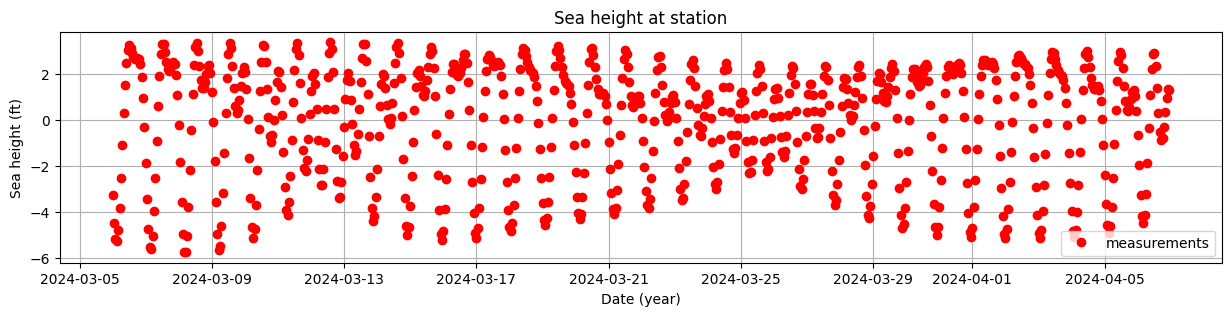

In [ ]:
# Run this to plot the data

# Convert time and height to numpy arrays for easy plotting
time= df['Date_Time (GMT)'].to_numpy()
height = df['Predicted (ft)'].to_numpy()

# Make a big figure to show all the data clearly
plt.figure(figsize = (15,3))
# plot the sea height data:
plt.plot(time,height,'ro')
plt.grid()
# Labels, title, beautification
plt.xlabel('Date (year)')
plt.ylabel('Sea height (ft)')
plt.title('Sea height at station')
plt.legend(['measurements','best linear fit'],loc=4)
plt.axis('tight')
plt.show()

In [ ]:
# Check out the df object. For example, print out the times to see their format.

df['Date_Time (GMT)']

0     2024-03-06 00:00:00
1     2024-03-06 01:00:00
2     2024-03-06 02:00:00
3     2024-03-06 03:00:00
4     2024-03-06 04:00:00
              ...        
763   2024-04-06 19:00:00
764   2024-04-06 20:00:00
765   2024-04-06 21:00:00
766   2024-04-06 22:00:00
767   2024-04-06 23:00:00
Name: Date_Time (GMT), Length: 768, dtype: datetime64[ns]

## 2.b

* Check that all time intervals are 1 hour long (i.e. that successive points are spaced by 1 hour)

Hint: try a simple subtraction between data in the time series. This may come in handy https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.total_seconds.html

In [ ]:
# BEGIN SOLUTION

#END SOLUTION

## 2.c

* Find the index of the time array that corresponds to the 9th day since the start of the time series.
* Zoom in onto a week-long portion of the data series and plot height vs time for only that portion.

In [ ]:
# YOUR CODE HERE

## 2.d

* Apply your Fourier interpolation from Part 1 to the shortened time series from 2.c. Make any adaptations needed to the data points.
* Plot the height versus time (with any rescaling you may have needed to do) for the shortened time series and overplot the interpolation solution. Make sure your plot is big enough to see the data clearly.

Hint: remember that the trigonometric interpolation implementation assumes the x data are mapped to [0,2$\pi$).

In [ ]:
# YOUR CODE HERE

## 2.e

* Once you make sure the results of your interpolation in 2.d are reasonable, perform the interpolation for the full dataset.
* Produce a plot of the height vs time data (again with any rescaling you may have needed to do).
* Overplot the interpolation for the full time series. Make sure your plot is big enough to see the data clearly.

In [ ]:
# YOUR CODE HERE

## 2.f

* Visualize in some way the common coefficients from your two interpolations (short vs full time series).
* Comment on any differences you see and why they may exist.

In [ ]:
# YOUR CODE HERE

## 2.g

* Print the largest (in absolute terms) coefficient of the Fourier interpolation of the full time series.
* Which wavenumber k does this coefficient correspond to?
* What is the period of this component as measured in hours? Store this value in a variable `T`

In [ ]:
# YOUR CODE HERE

In [ ]:
# If all is well your code should pass this test
assert np.abs(T-24.) < 2

NameError: name 'T' is not defined

## 2.h

* Plot the height vs time data from the full time series again, and overplot a line that corresponds to the contribution of the dominant component of the Fourier interpolation (the term that has coefficient equal to the max one you found in 2.e).
* Comment on whether that captures the main oscillation you see by eye.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR COMMENT HERE